In [2]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
plt.style.use('fivethirtyeight')

# Module_04 - project
## customized yoyo despinning mechanism 

![yoyo despinning mechanism on a shuttle](./yoyo-rocket.svg)

A rocket yoyo-despinning mechanism uses cords wrapped around the
payload. These cords unravel and slow the spinning of the rocket. In
this tutorial, you will consider the engineering system, conservation of
angular momentum, and conservation of energy. 

## Engineering system - kinematics

As the yoyo mass unravels, it moves further from the payload. The total
distance from the payload center of mass (COM) is described by 

$\mathbf{r}_{P/G} = R\hat{e}_R + l\hat{e}_{\theta}$

where $R$ is the payload radius, $l$ is the length of the cord, and
$\hat{e}_R$ and $\hat{e}_{\theta}$ are unit vectors in a cylindrical
coordinate system. The length of the cord depends upon the angle of the
payload, $\theta$. Consider a spool of thread rolling across the floor,
the thread left on the floor is equal to distance traveled or,
$R\theta$. Now, the position of yoyo P is

$\mathbf{r}_{P/G} = R\hat{e}_R + R\theta\hat{e}_{\theta}$

where $\theta$ is the change in angle of the payload after the yoyos are
released. The velocity of mass P is $\dot{\mathbf{r}}_{P/G}$, using the transport
equation

$\mathbf{v}_{P/G} = \frac{d}{dt}(R\hat{e}_R + R\theta\hat{e}_{\theta}) +
{}^I\mathbf{\omega}^C \times(R\hat{e}_R + R\theta\hat{e}_{\theta})$

where the total angular velocity is the combination of the payload's
angular velocity $\mathbf{\omega}_B$ and the angular velocity of the
yoyo relative to the payload, ${}^B \mathbf{\omega}^C=\dot{\theta}\hat{k}$. The addition of
payload and yoyo angular velocity is the total 

${}^I\mathbf{\omega}^C = \omega_B \hat{k} +
\dot{\theta}\hat{k}$

## Project guidelines

Choose a payload and estimate its mass and moment of inertia. You can then design the yoyo despinning mechanism to stop it from rotating at 5 Hz ($\dot{\theta} = 15~\frac{rad}{s}$)

In this example, I estimate the mass and moment of inertia for a Tesla that was launched into space. 

![tesla roadster in space](https://inteng-storage.s3.amazonaws.com/images/FEBRUARY/sizes/roadster-spacex-starman_resize_md.jpg)

I am using the following estimates:

- M = 1237 kg [wiki article on Tesla roadster](https://en.wikipedia.org/wiki/Tesla_Roadster_(first_generation))
- Length = 3.946 m (155.4 in)
- Width = 1.873 m (73.7 in)
- Height = 1.127 m (44.4 in)
- $I \approx \frac{m}{12}(Width^2 + Height^2)$ [Solid Cuboid approximation](https://en.wikipedia.org/wiki/List_of_moments_of_inertia)

In [38]:
# Set up the Python variables
M = 1237 # kg
W = 1.873
H = 1.127
R = W
I = M/12*(W**2 + H**2)
m = 0.01
w0 = 15

This result, _combining conservation of angular momentum and
work-energy_, tells you that the angular velocity of the yoyos will be
be equal to the initial angular velocity of the payload. The angle
$\theta$ will
continue increase as $\omega_B^0 t$ until released. Plug this result into
the orginal conservation of angular momentum equation to solve for
$\omega_B$

$c(\omega_B^0 - \omega_B) = (\omega_B^0 t)^2(\omega_B+\omega_B^0)$

$\omega_B(t) = \frac{c-(\omega_B^0 t)^2}{c+(\omega_B^0 t)^2}\omega_B^0.$

In [39]:
t = np.linspace(0, 1, 100)
theta = w0*t 

The added benefit of using cords to release the yoyos is that the
payload angular velocity can be reduced to 0 rad/s at time, $t_f$. 

$\omega_B(t_f) = 0 = c - (\omega_B^0t)^2 \rightarrow t_f =
\frac{\sqrt{c}}{\omega_B^0} =
\frac{1}{\omega_B^0}\sqrt{\frac{I}{2mR^2}+1}.$

The final cord length, is unraveling distance, $l_F = R\theta  =
R\omega_B^0 t_f$

$l_F = \sqrt{\frac{I}{2m}+R^2}$

In [40]:
c = np.sqrt(I/2/m/R**2 + 1)
tf = np.sqrt(c)/w0
lf = R*np.sqrt(c)

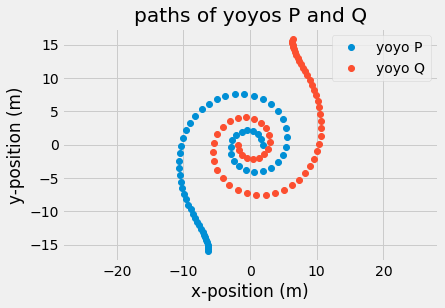

In [41]:

wB = lambda t: (c-w0**2*t**2)/(c+w0**2*t**2)*w0
wC = wB(t) + w0
x = R*np.cos(wC*t) - R*w0*t*np.sin(wC*t)
y = R*np.sin(wC*t) + R*w0*t*np.cos(wC*t)
plt.plot(x[t < tf],y[t < tf], 'o', label = 'yoyo P')
plt.plot(-x[t < tf],-y[t < tf], 'o', label = 'yoyo Q')
plt.axis('equal')
plt.title('paths of yoyos P and Q')
plt.xlabel('x-position (m)')
plt.ylabel('y-position (m)')
plt.legend();

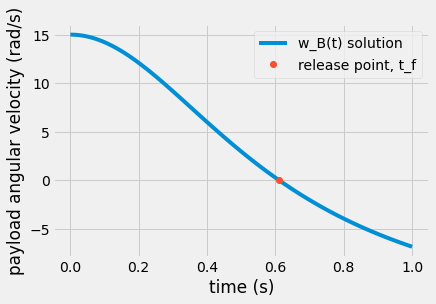

In [42]:
plt.plot(t,wB(t),label = 'w_B(t) solution')
plt.plot(tf,wB(tf),'o', label = 'release point, t_f')
plt.legend();
plt.xlabel('time (s)')
plt.ylabel('payload angular velocity (rad/s)');

In [43]:
print('release the yoyos after {:.2f} seconds'.format(tf))
print('with a cord length of {:.2f} m'.format(lf))

release the yoyos after 0.61 seconds
with a cord length of 17.15 m


## Wrapping up

- Why does the rotation rate become negative if the yoyos are not release?
- What happens when you change the mass of the yoyos? 
- What else did you notice in this design?